<h1 align="center"> Implementation of a Singly Linked List </h1>

In [68]:
class Node(object):
    def __init__(self, data, link=None):
        self.link = link
        self.data = data

    def get_data(self):
        return self.data    

    def get_next(self):
        return self.link

    def set_link(self, data=None):
        # Recursive definition!
        self.link = Node(data)

In [117]:
class LinkedList(object):
    def __init__(self, head=None):
        self.head = head
        self.size = 1
        
    def insert(self, data):
        node = Node(data, link=self.head)
        self.head = node
        self.size += 1
    
    def delete(self, data):
        prev = None
        node = self.head

        while node:
            if node.get_data() == data:
                if not prev:
                    self.head = node.get_next()
                else:
                    prev.set_link(node.get_next())
                del node
                return True

            prev, node = node, node.get_next()
        return False

    def search(self, data):
        node = self.head
        while node:
            if node.get_data() == data:
                return node
            node = node.get_next()

## Recursive function to traverse backwards through the singly linked list

In [218]:
def walk_backwards(head: Node):
    if head:
        print("Data: ", head.get_data(), "\n"
            "Link: ", head.get_next(), "\n"
            )

        walk_backwards(head.get_next())


In [219]:
ll = LinkedList(Node("spam"))
ll.insert("ham")

if ll.search("ham"):
    print("found!")

ll.insert("eggs")
ll.insert("foo")
ll.insert("bar")
walk_backwards(ll.head)

found!
Data:  bar 
Link:  <__main__.Node object at 0x7f1742d25fa0> 

Data:  foo 
Link:  <__main__.Node object at 0x7f1742ff9190> 

Data:  eggs 
Link:  <__main__.Node object at 0x7f1742fbbc70> 

Data:  ham 
Link:  <__main__.Node object at 0x7f1742fbb0d0> 

Data:  spam 
Link:  None 



# Graphical representation

In [211]:
import networkx as nx
import random

In [217]:
def get_nodes(ll: LinkedList) -> list:
    node = ll.head
    nodes = []
    while node:
        nodes.append(node)
        node = node.get_next()
    return nodes

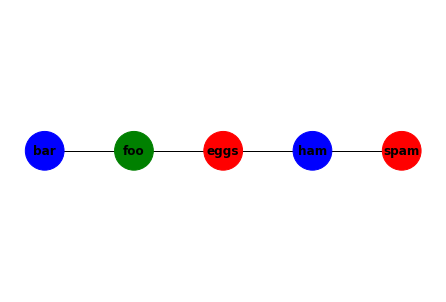

In [223]:
def draw_graph(ll: LinkedList):
    G = nx.Graph()
    nodes = get_nodes(ll)    
    
    # code all nodes to positions on graph all y=2
    positions = {i: [i, 2] for i, _ in enumerate(nodes)}
    edges = [(i, i+1) for i, _ in enumerate(nodes[:-1])]
    labels = {i: nodes[i].get_data() for i, _ in enumerate(nodes)}
    colours = [random.choice(['r', 'g', 'b']) for i, _ in enumerate(nodes)]

    G.add_edges_from(edges)
    nx.draw(G, pos=positions,
        node_color=colours, node_size=1500,
        labels=labels, with_labels=True, font_weight="bold")

draw_graph(ll)